<a href="https://colab.research.google.com/github/dvian91/FP-Sains-data/blob/main/FP_sainsdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project: Prediksi Penyakit Jantung
# Model: Support Vector Machine (SVM)
# Dataset Source:
# https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
#
# Kelompok:
# - Dede Khairunnisa Aulia (22416255201250)
# - Dhiva Jivianikmah (22416255201056)
#
# Keterangan:
# Dataset ini digunakan untuk memprediksi resiko penyakit jantung.

Pengumpulan dan Pra-pemrosesan Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart_cleveland_upload.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [ ]:
X = df.drop('condition', axis=1)
y = df['condition'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
print(df.isnull().sum())
print(df.dtypes)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
print(df.dtypes)

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


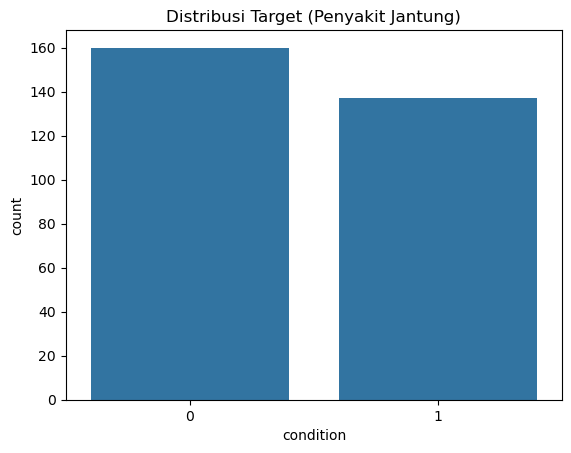

In [ ]:
sns.countplot(x='condition', data=df)
plt.title('Distribusi Target (Penyakit Jantung)')
plt.show()


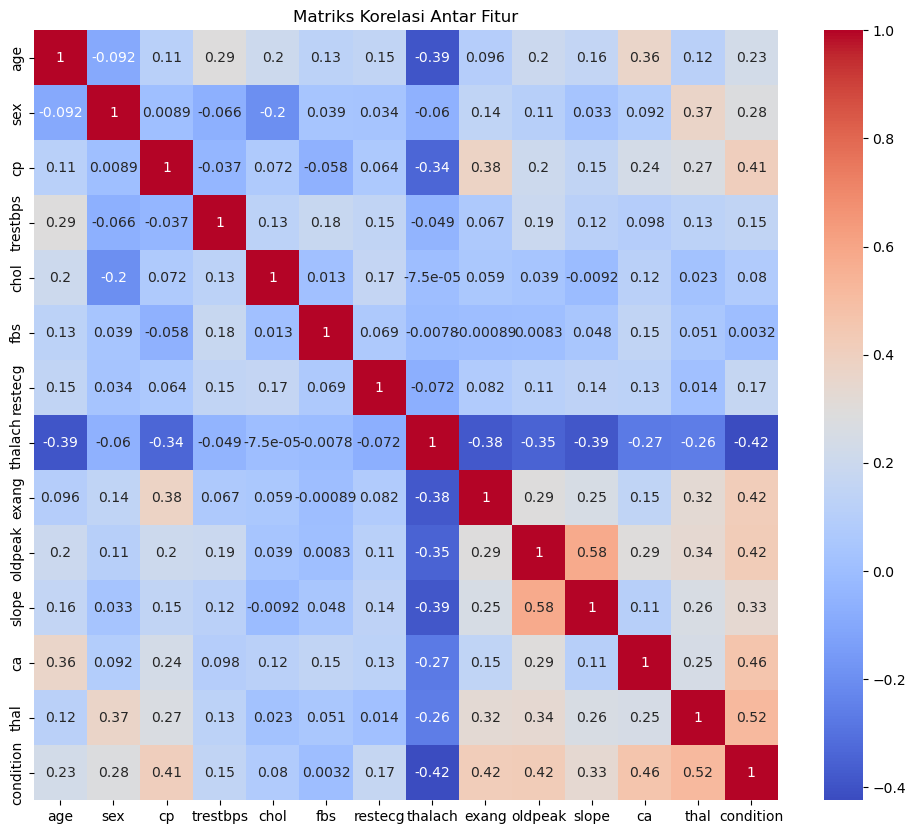

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

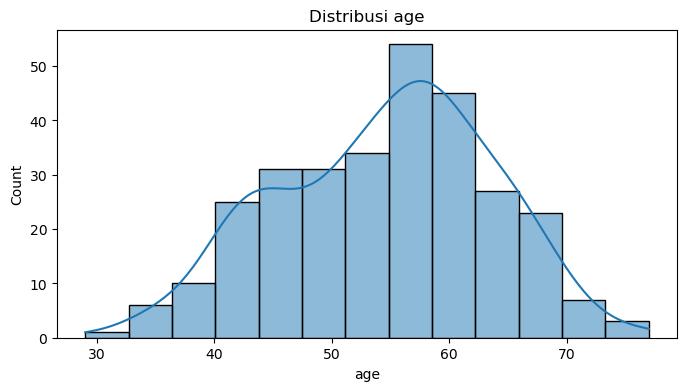

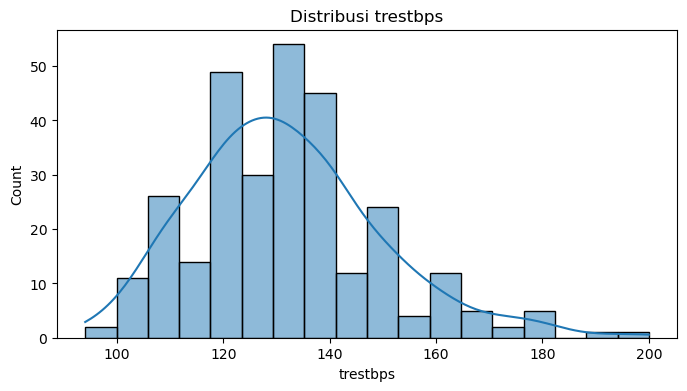

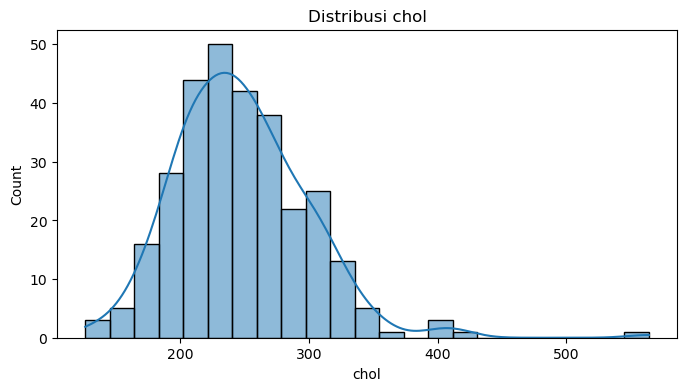

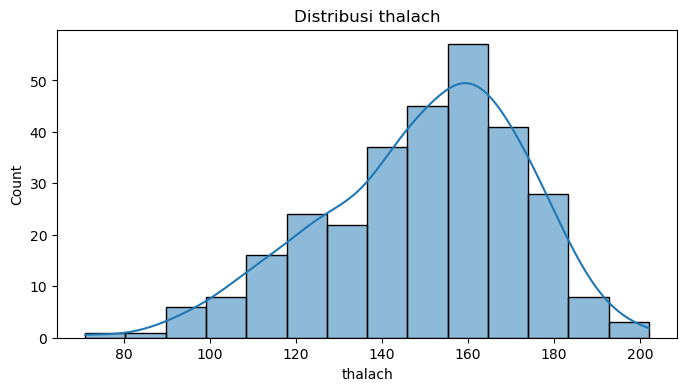

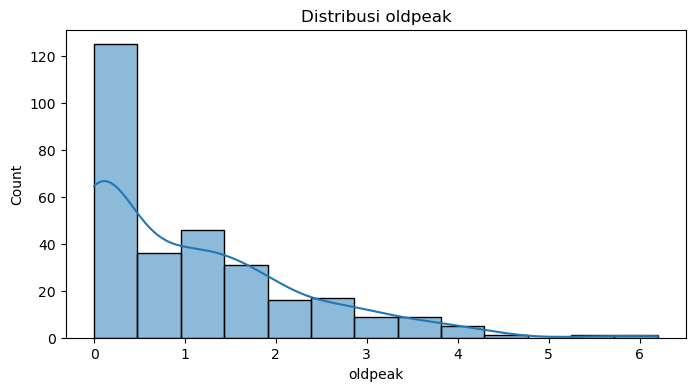

In [ ]:
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

In [ ]:
df['age_category'] = pd.cut(df['age'],
                              bins=[29, 40, 55, 77],
                              labels=['Muda', 'Dewasa', 'Lansia'])

print(df[['age', 'age_category']].head())

   age age_category
0   69       Lansia
1   69       Lansia
2   66       Lansia
3   65       Lansia
4   64       Lansia


In [ ]:
df.to_csv('heart_cleaned.csv', index=False)

Pemodelan dan Pembelajaran Mesin (SVM)

In [ ]:
data = pd.read_csv('heart_cleaned.csv')

X = data.drop(columns=['condition', 'age_category'])
y = data['condition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Validasi dan Evaluasi Model

In [ ]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy*100:.2f}%')
print(classification_report(y_test, y_pred))

Akurasi: 90.00%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[32  0]
 [ 6 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



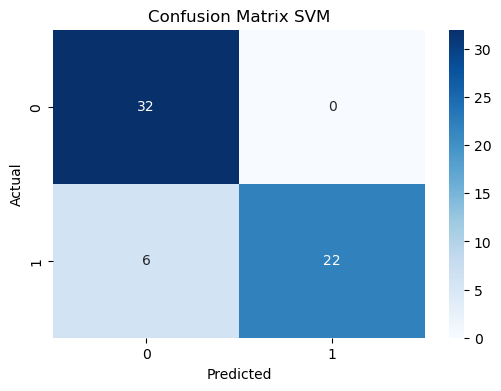

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle
with open('model_prediksi.sav', 'wb') as file:
    pickle.dump(svm_model, file)

In [ ]:
with open('scaler_prediksi.sav', 'wb') as file:
    pickle.dump(scaler, file)